In [1]:
import sqlite3, pandas

conn = sqlite3.connect('kinara_assessment_20181008.db')
df = pandas.read_sql_query('''SELECT * FROM loan_information
                     LEFT OUTER JOIN enteprise_information USING (enterprise_id)
                     LEFT OUTER JOIN disbursements_information USING (account_number)
                     LEFT OUTER JOIN scores_information USING (loan_id)''', conn)
conn.close()

In [2]:
df.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,net_disbursement_magnitude,transaction_Date,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,5692,TLMFS0000055,17850,6278,2017-03-07,TLMFS,46,Manufacturing,Job Work,Auto Components,345909.0,2017-02-28,32,Cash & Non Banked,0
1,6190,TLWCU0001219,17857,6280,2017-03-07,TLWCU,32,Trading,Retail,Book Stores,144157.0,2017-02-28,35,Cash & Non Banked,0
2,6191,TLAPS0000292,9481,2916,2017-03-07,TLAPS,32,Manufacturing,Sales,Electricals,484931.0,2017-03-23,32,Cash & Non Banked,0
3,6192,LCRIU0000019,6597,32,2017-03-10,LCRIU,32,Manufacturing,Job Work & Sales,Auto Components,683859.0,2017-03-13,None,None,None
4,6193,LCRIU0000020,9732,3167,2017-03-13,LCRIU,32,Manufacturing,Job Work,Auto Components,896703.0,2017-03-15,39,Cash & Non Banked,548


In [3]:
df_clean = df.drop(columns=['loan_id', 'account_number', 'customer_id', 'enterprise_id', 'screening_date',
                    'hub_id', 'transaction_Date'])

In [4]:
df_clean.isnull().any()

product_code                      True
business_type                    False
business_activity                False
business_sector                   True
net_disbursement_magnitude        True
ManagAgeui_APP                    True
BusinFormalityOfTheBusinessui     True
ManagCBscoreui_APP                True
dtype: bool

In [5]:
df_clean.fillna({'ManagAgeui_APP': df.ManagAgeui_APP.median(),
           'ManagCBscoreui_APP':df.ManagCBscoreui_APP.median(),
           'product_code': 'N',
           'business_sector': df.business_sector.mode().loc[0],
           'net_disbursement_magnitude': 0,
           'BusinFormalityOfTheBusinessui': df.BusinFormalityOfTheBusinessui.mode().loc[0]}, inplace=True)

In [6]:
df_clean[['ManagAgeui_APP', 'ManagCBscoreui_APP']] = df_clean[['ManagAgeui_APP', 'ManagCBscoreui_APP']].apply(
    pandas.to_numeric, downcast='integer')
excluded = [x for x in df_clean.columns if x not in
            ('net_disbursement_magnitude', 'ManagAgeui_APP', 'ManagCBscoreui_APP')]
df_clean[excluded] = df_clean[excluded].astype('category')

In [26]:
df_clean['label'] = df.account_number.apply(lambda x: 0 if x is None else 1).astype('category')
df_clean['product_code'] = df_clean.product_code.apply(lambda x: x[-1]).astype('category')

In [27]:
df_clean.dtypes

product_code                     category
business_type                    category
business_activity                category
business_sector                  category
net_disbursement_magnitude        float64
ManagAgeui_APP                       int8
BusinFormalityOfTheBusinessui    category
ManagCBscoreui_APP                  int16
label                            category
dtype: object

In [9]:
df_clean.head()

,product_code,business_type,business_activity,business_sector,net_disbursement_magnitude,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,label
0,S,Manufacturing,Job Work,Auto Components,345909.0,32,Cash & Non Banked,0,1
1,U,Trading,Retail,Book Stores,144157.0,35,Cash & Non Banked,0,1
2,S,Manufacturing,Sales,Electricals,484931.0,32,Cash & Non Banked,0,1
3,U,Manufacturing,Job Work & Sales,Auto Components,683859.0,37,Cash & Non Banked,757,1
4,U,Manufacturing,Job Work,Auto Components,896703.0,39,Cash & Non Banked,548,1


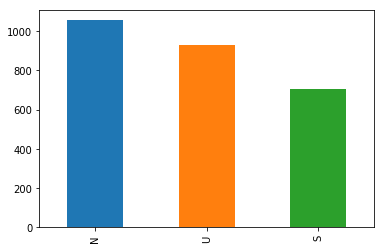

In [10]:
df_clean.product_code.value_counts().plot(kind='bar')

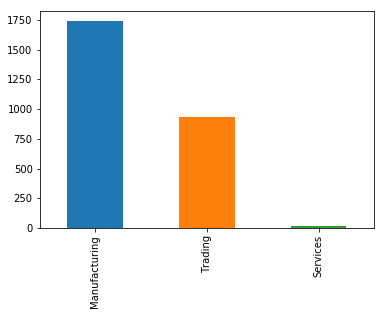

In [11]:
df_clean.business_type.value_counts().plot(kind='bar')

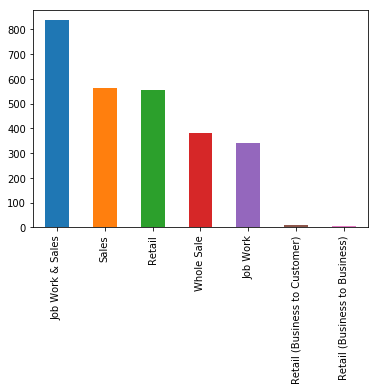

In [12]:
df_clean.business_activity.value_counts().plot(kind='bar')

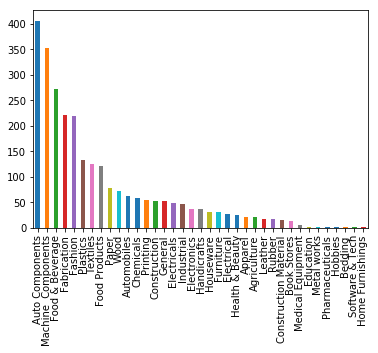

In [13]:
df_clean.business_sector.value_counts().plot(kind='bar')

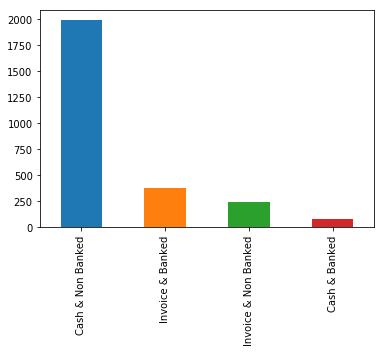

In [14]:
df_clean.BusinFormalityOfTheBusinessui.value_counts().plot(kind='bar')

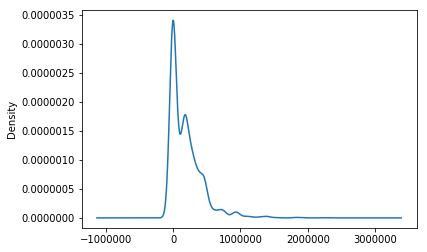

In [15]:
df_clean.net_disbursement_magnitude.plot(kind='density')

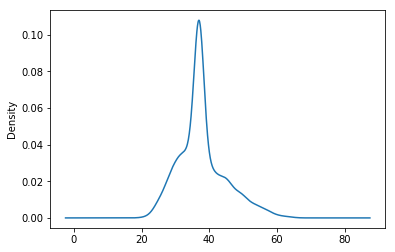

In [16]:
df_clean.ManagAgeui_APP.plot(kind='density')

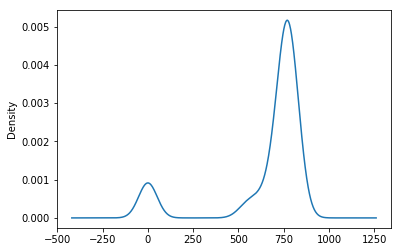

In [17]:
df_clean.ManagCBscoreui_APP.plot(kind='density')

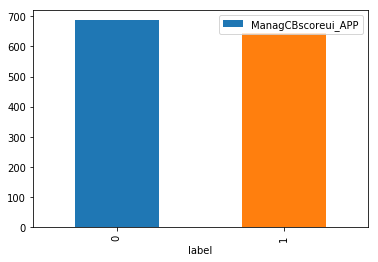

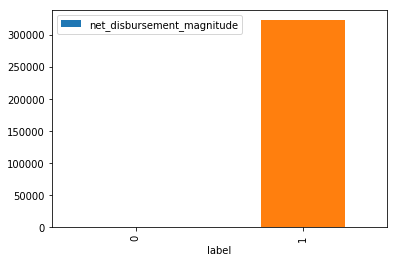

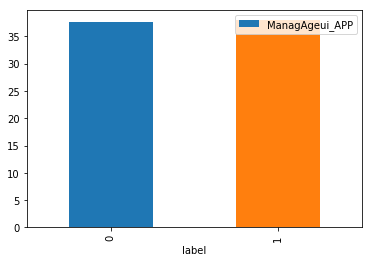

In [18]:
grp = df_clean.groupby('label')
grp_mean = grp.mean()
grp_mean.plot(y='ManagCBscoreui_APP', kind='bar')
grp_mean.plot(y='net_disbursement_magnitude', kind='bar')
grp_mean.plot(y='ManagAgeui_APP', kind='bar')

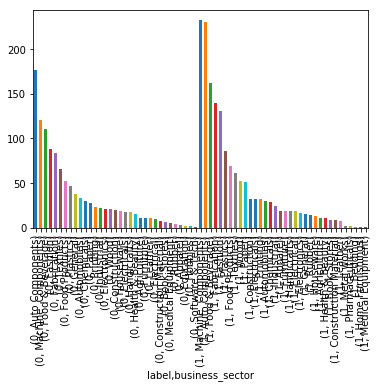

In [25]:
grp.business_sector.value_counts().plot(kind='bar')

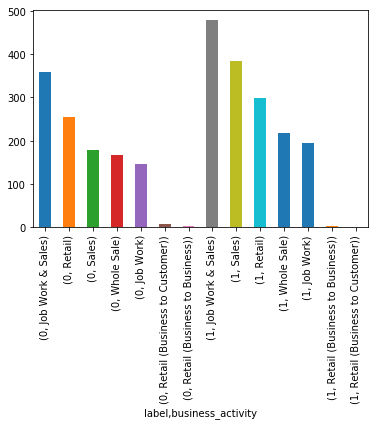

In [24]:
grp.business_activity.value_counts().plot(kind='bar')

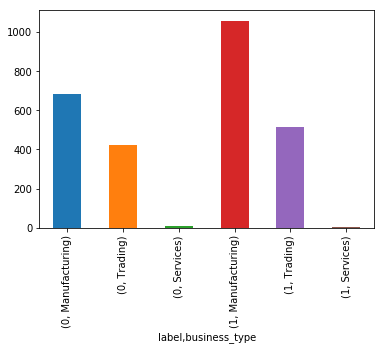

In [28]:
grp.business_type.value_counts().plot(kind='bar')

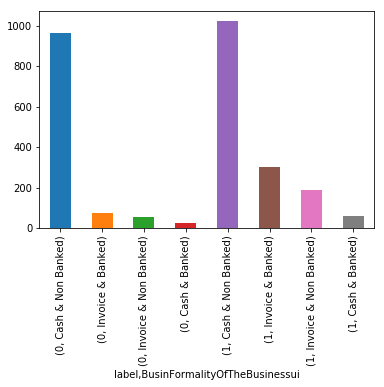

In [29]:
grp.BusinFormalityOfTheBusinessui.value_counts().plot(kind='bar')

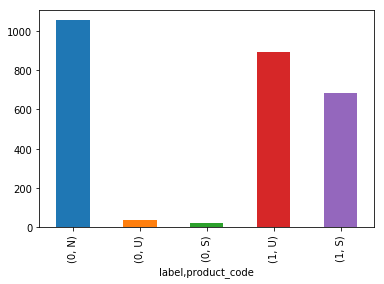

In [30]:
grp.product_code.value_counts().plot(kind='bar')